In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np 

from tensorflow.keras import datasets, layers, models

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

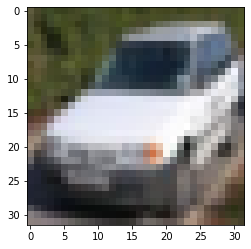

In [9]:
plt.imshow(train_images[46])

In [12]:
class_names[train_labels[46][0]]

'automobile'

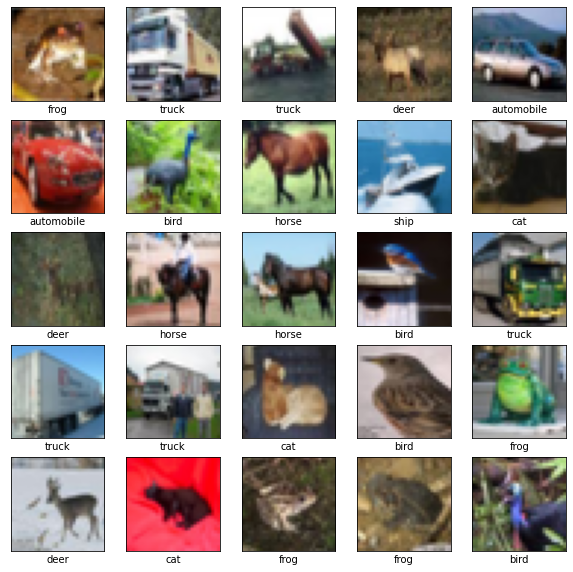

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

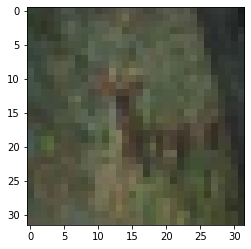

In [14]:
plt.imshow(train_images[10])

In [17]:
class_names[ train_labels[10][0] ]

'deer'

In [7]:
train_images.shape

(50000, 32, 32, 3)

In [8]:
test_images.shape

(10000, 32, 32, 3)

In [11]:
train_images[0][0][0] # Size 32 by 32, the 3 represents RGB colour

array([0.23137255, 0.24313725, 0.24705882])

In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
trained_model = model.fit(train_images, train_labels, epochs=10, 
                validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 179us/sample - loss: 1.5135 - accuracy: 0.4495 - val_loss: 1.3093 - val_accuracy: 0.5270
Epoch 2/10
50000/50000 [==============================] - 6s 125us/sample - loss: 1.1570 - accuracy: 0.5908 - val_loss: 1.0714 - val_accuracy: 0.6179
Epoch 3/10
50000/50000 [==============================] - 6s 123us/sample - loss: 1.0151 - accuracy: 0.6428 - val_loss: 0.9915 - val_accuracy: 0.6550
Epoch 4/10
50000/50000 [==============================] - 6s 125us/sample - loss: 0.9220 - accuracy: 0.6779 - val_loss: 0.9292 - val_accuracy: 0.6781
Epoch 5/10
50000/50000 [==============================] - 6s 124us/sample - loss: 0.8513 - accuracy: 0.7013 - val_loss: 0.9176 - val_accuracy: 0.6825
Epoch 6/10
50000/50000 [==============================] - 6s 124us/sample - loss: 0.7961 - accuracy: 0.7215 - val_loss: 0.8967 - val_accuracy: 0.6862
Epoch 7/10
50000/50000 [==========================

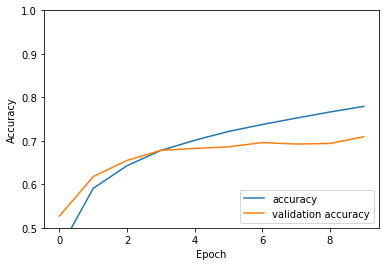

In [16]:
plt.plot(trained_model.history['accuracy'], label='accuracy')
plt.plot(trained_model.history ['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 1s - loss: 0.8635 - accuracy: 0.7094


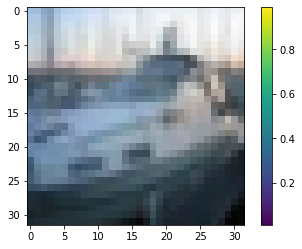

In [18]:
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
class_names[np.argmax(model.predict(test_images[2:3]))]

'ship'

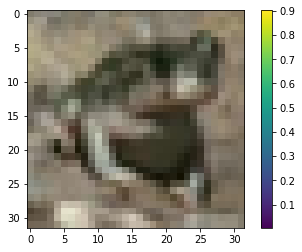

In [30]:
plt.figure()
plt.imshow(test_images[64])
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
class_names[np.argmax(model.predict(test_images[64:65]))]

'frog'